![title](images/classroom/bb_blank.png)

## Case Study

- Explore and perform analysis on a real dataset using Python
- Goal: get good understanding of using Python for data management, exploration, and analysis

## What is Ethereum?
<img src="images/Cut_outs/Cut_out_18.png" width=100 height=100 />

Ethereum is a technology that lets you send cryptocurrency to anyone for a small fee. It also powers applications that everyone can use and no one can take down. It's the world's programmable blockchain and a marketplace of financial services, games and apps that can't steal your data or censor you. 

Ethereum also has its own cryptocurrency, namely 'ETHER' or 'ETH' for short. Check out more about Ethereum and ETH on https://ethereum.org/. 

## Slot-Slashed Dataset

This dataset is obtained from the Beacon Scan block explorer, where it provides the information on 1751 slashed validators. Being slashed means that a significant part of the validator’s stake is removed: up to the whole stake of 32 ETH in the worst case. Validator software and staking providers will have built-in protection against getting slashed accidentally. Slashing should only affect validators who misbehave deliberately. For more info, please visit https://codefi.consensys.net/blog/rewards-and-penalties-on-ethereum-20-phase-0. 

## Why do validators get slashed?

Ethereum 2.0’s consensus mechanism has a couple of rules that are designed to prevent attacks on the network. Any validator found to have broken these rules will be slashed and ejected from the network. According to a blog post on Codefi, there are three ways a validator can gain the slashed condition:

1. By being a proposer and sign two different beacon blocks for the same slot.
2. By being an attester and sign an attestation that "surrounds" another one.
3. By being an attester and sign two different attestations having the same target.


## Explore the data in Python

Let's load the data and look at the first few rows. We will use the <b> pandas </b> and <b> mathplotlib </b> libraries. Also, we can use the <b> head() </b> function to show the first five rows. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_slashed = pd.read_csv('slot-slashed.csv')

In [3]:
df_slashed.head()

Unnamed: 0  epoch    slot                 age  validatorSlashed  slashedBy  \
0           1  15087  482814  21 hrs 40 mins ago              2959      15144   
1           2  15087  482814  21 hrs 40 mins ago              2948      15144   
2           3  15087  482814  21 hrs 40 mins ago              2603      15144   
3           4  15087  482814  21 hrs 40 mins ago              2478      15144   
4           5  15087  482814  21 hrs 40 mins ago              2151      15144   

                     reason  
0  Attestation rule offense  
1  Attestation rule offense  
2  Attestation rule offense  
3  Attestation rule offense  
4  Attestation rule offense

Let's rename that 'Unnamed: 0' to 'rowindex' using <b> rename() </b> and we use the parameter <b> inplace=True </b> to save the changes.

In [4]:
df_slashed.rename(columns={'Unnamed: 0': 'rowindex'}, inplace=True)

## The variables 

The 7 variables are:

* `rowindex` - The row index of the validator.
* `epoch` - The epoch number that the validator was slashed.
* `slot` - The slot number that the validator was slashed.
* `age` - The amount of time passed since the validator was slashed.
* `validatorSlashed` - The index of the validator who was slashed.
* `slashedBy` - The index of the validator who did the slashing.
* `reason` - The reason why the validator was slashed.


We can use <b> dtypes </b> to see the data types of each column and <b> shape </b> to see the size of the data. 

In [5]:
df_slashed.dtypes

rowindex             int64
epoch                int64
slot                 int64
age                 object
validatorSlashed     int64
slashedBy            int64
reason              object
dtype: object

In [6]:
df_slashed.shape

(1751, 7)

We can see that we have 1751 rows and 7 columns (2 character and 5 numeric). 

We begin our analysis with some high level statistics. Let's summarize the data using the <b> describe() </b> function. This command produces a simple summary table of centrality and spread statistics of our collected features. 

In [7]:
df_slashed.describe(include='all')

rowindex         epoch           slot                 age  \
count   1751.000000   1751.000000    1751.000000                1751   
unique          NaN           NaN            NaN                 215   
top             NaN           NaN            NaN  53 days 12 hrs ago   
freq            NaN           NaN            NaN                 216   
mean    1032.424329   4815.563107  154114.229012                 NaN   
std      625.801109   3432.770104  109848.597871                 NaN   
min        1.000000      4.000000     139.000000                 NaN   
25%      444.500000   3251.500000  104065.500000                 NaN   
50%      982.000000   3322.000000  106317.000000                 NaN   
75%     1620.500000   3530.000000  112965.500000                 NaN   
max     2160.000000  15087.000000  482814.000000                 NaN   

        validatorSlashed     slashedBy                    reason  
count        1751.000000   1751.000000                      1751  
unique               NaN           NaN                         2  
top                  NaN           NaN  Attestation rule offense  
freq                 NaN           NaN                      1699  
mean        15803.682467  18936.914335                       NaN  
std         13023.975868  12598.778081                       NaN  
min            45.000000     87.000000                       NaN  
25%          6341.500000  10695.000000                       NaN  
50%         11443.000000  17788.000000                       NaN  
75%         22532.000000  26738.000000                       NaN  
max         77039.000000  74957.000000                       NaN

Let's get the numbers of unique values in each column using <b> unique() </b>. 

In [8]:
df_slashed.nunique()

rowindex            1751
epoch                381
slot                 815
age                  215
validatorSlashed    1647
slashedBy            771
reason                 2
dtype: int64

Thus, we have 1647 unique validators that were slashed and they were slashed by 771 unique validators for only 2 reasons. 

## Time series

Let's find out how many validators are slashed over time. We can count the number of each 'epoch' group using <b> groupby() </b> and <b> count() </b>. Then, plot it using <b> plot() </b>. 


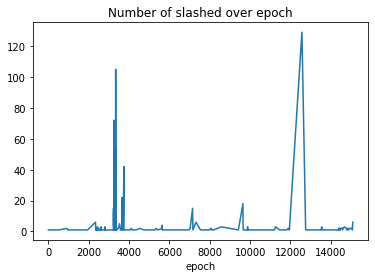

In [9]:
df_slashed.groupby('epoch').count()['rowindex'].plot()
plt.title('Number of slashed over epoch')
plt.show()

To better assess the impact of these spikes in slashings, we produced a cumulative count plot that tracks the total number of slashings across epochs. We can do this very easily by simply adding a temporary column using <b> mutate() </b> and <b> cumsum() </b>.  

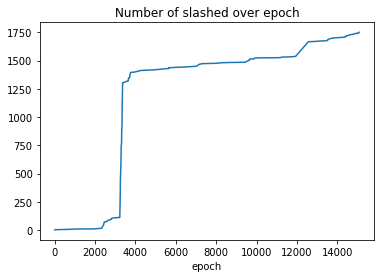

In [10]:
df_slashed.groupby('epoch').count()['rowindex'].cumsum().plot()
plt.title('Number of slashed over epoch')
plt.show()

The first large spike in slashings occurs around epoch 3000 and another smaller spike in slashing around epoch 12500. Despite the fact that these jumps are significant, when focusing on the rate of change of slashings, the number of offensive rule violations are quite stable the majority of the time. Globally, the rate of slashing is approximately 117 slashes per 1000 epochs. When we exclude the spikes, the rate of change is approximately 63 slashes per 1000 epochs.


## How much time elapsed between slashings?

Next, we can investigate how often a slash occurs. We need to take a few steps:

1. Create 'previousepoch' which is simply a 'epoch' shifted one row up 
2. Create 'epochelapsed' by subtracting 'previousepoch' from 'epoch'
3. Filter out the rows where 'epochelapsed' is 0 just to exclude slashings that occur within the same epoch.
4. Compute summary statistics


In [11]:
df_slashed['epochelapsed'] = df_slashed['epoch']-df_slashed['epoch'].shift(-1)
Epochelapsed = df_slashed[df_slashed['epochelapsed'] > 0]
Epochelapsed['epochelapsed'].describe()

count    380.000000
mean      39.692105
std      102.182270
min        1.000000
25%        1.000000
50%        3.000000
75%       26.000000
max      900.000000
Name: epochelapsed, dtype: float64

From the summary, we can see that approximately 40 epochs elapse between slashings on average, excluding slashings that occur in the same epoch. Let's plot the histogram so we can investigate further. 


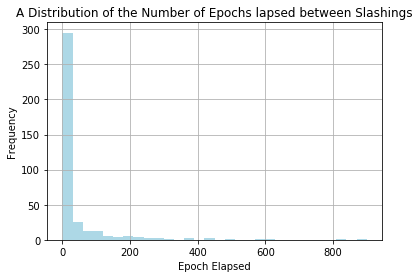

In [12]:
Epochelapsed.hist('epochelapsed', bins=30, color='lightblue')
plt.title('A Distribution of the Number of Epochs lapsed between Slashings')
plt.xlabel('Epoch Elapsed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We can see that it is very common that less than 25 epochs will elapse between slashings. In fact, about 41% of the time only 1 epoch without a slashing will occur between two epochs with at least 1 slashing. The longest period without a slashing lasted 900 epochs, which is 93 hours.]


## Your turn

<img src="images/Cut_outs/Cut_out_04.png" width=100 height=100 />

We can find out more about the epoch elapsed between slashings.

1. Verify the fact that about 41% of the 'epochelapsed' is 1. 
2. Draw a red timeseries of 'epochelapsed' using 'previousepoch' and give it a title.  


## Answers:

## 1

In [13]:
Epochelapsed.groupby('epochelapsed').count()/Epochelapsed.shape[0]*100

rowindex      epoch       slot        age  validatorSlashed  \
epochelapsed                                                                 
1.0           41.052632  41.052632  41.052632  41.052632         41.052632   
2.0            5.789474   5.789474   5.789474   5.789474          5.789474   
3.0            4.473684   4.473684   4.473684   4.473684          4.473684   
4.0            2.631579   2.631579   2.631579   2.631579          2.631579   
5.0            2.631579   2.631579   2.631579   2.631579          2.631579   
...                 ...        ...        ...        ...               ...   
499.0          0.263158   0.263158   0.263158   0.263158          0.263158   
578.0          0.263158   0.263158   0.263158   0.263158          0.263158   
624.0          0.263158   0.263158   0.263158   0.263158          0.263158   
827.0          0.263158   0.263158   0.263158   0.263158          0.263158   
900.0          0.263158   0.263158   0.263158   0.263158          0.263158   

              slashedBy     reason  
epochelapsed                        
1.0           41.052632  41.052632  
2.0            5.789474   5.789474  
3.0            4.473684   4.473684  
4.0            2.631579   2.631579  
5.0            2.631579   2.631579  
...                 ...        ...  
499.0          0.263158   0.263158  
578.0          0.263158   0.263158  
624.0          0.263158   0.263158  
827.0          0.263158   0.263158  
900.0          0.263158   0.263158  

[94 rows x 7 columns]

## 2

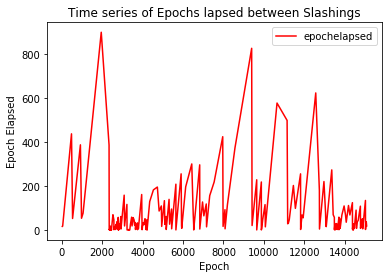

In [14]:
Epochelapsed.plot('epoch','epochelapsed', color='red')
plt.title('Time series of Epochs lapsed between Slashings')
plt.xlabel('Epoch')
plt.ylabel('Epoch Elapsed')
plt.show()

## Why are the validators slashed?

Of the three ways a validator can violate consensus rules, there are only two such categories of offenses: attestation rule and proposer rule violations. Let's create a histogram that shows the percentage of each reason why a validator was slashed. 

One way to do it is similar to what we have been doing. we use <b> groupby </b> and <b> count() </b> to get the data. Here, we can use <b> plot.bar() </b> as we want to plot a bar chart as it is. 


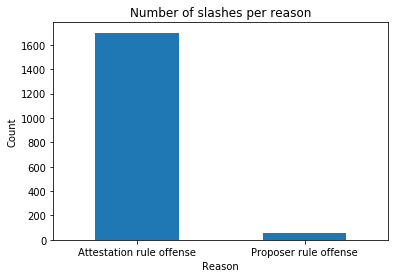

In [15]:
df_slashed.groupby('reason').count()['rowindex'].plot.bar(rot=0)
plt.title('Number of slashes per reason')
plt.xlabel('Reason')
plt.ylabel('Count')
total = df_slashed.shape[0]
plt.show()

We can also add the percentages of each reason using the following codes.

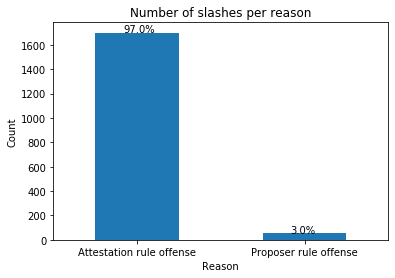

In [16]:
ax=df_slashed.groupby('reason').count()['rowindex'].plot.bar(rot=0)
plt.title('Number of slashes per reason')
plt.xlabel('Reason')
plt.ylabel('Count')
total = df_slashed.shape[0]

for p in ax.patches:
        #format to percent
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        
        # make the (x,y) position of the percentage
        x = p.get_x() + p.get_width()/3
        y = p.get_y() + p.get_height()+1
        
        # make the annotation appear 
        ax.annotate(percentage, (x, y))
plt.show()

The distribution is skewed heavily towards attestation rule violations as they encompass nearly 97% of justifications for slashes in our data. The remaining 3% of slashes can be attributed to proposer rule offenses.

Interestingly, this distribution has not been constant over time. Let's find out exactly how it changes over time. To do so, we can do the following:

1. Group by 'epoch' and 'reason' 
2. Use <b> count() </b> 
3. Use <b> unstack() </b> so each combination will appear even the count is 0. 
4. Fill all the 'NA' with 0 using <b> fillna() </b> 

In [17]:
num_slashed_over_epoch_reason = df_slashed.groupby(['epoch','reason']).count()['rowindex'].unstack().fillna(0)

In [18]:
num_slashed_over_epoch_reason

reason  Attestation rule offense  Proposer rule offense
epoch                                                  
4                            0.0                    1.0
21                           1.0                    0.0
39                           1.0                    0.0
477                          1.0                    0.0
530                          0.0                    1.0
...                          ...                    ...
14892                        2.0                    0.0
15027                        2.0                    0.0
15030                        2.0                    0.0
15068                        0.0                    1.0
15087                        6.0                    0.0

[381 rows x 2 columns]

Now that we have the table, we can easily produce a time series of showing the numbers of the reason over time. We can also use 

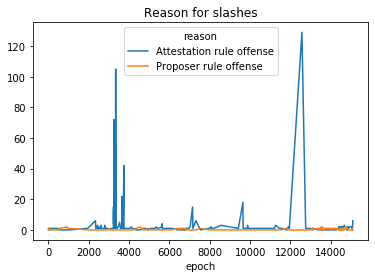

In [19]:
num_slashed_over_epoch_reason.plot()
plt.title('Reason for slashes')
plt.show()

The plot is great but we can barely see the graph for 'Poposer rule offense'. Let's fix that by the parameter <b> subplots=True </b> to separate the plots into two. 

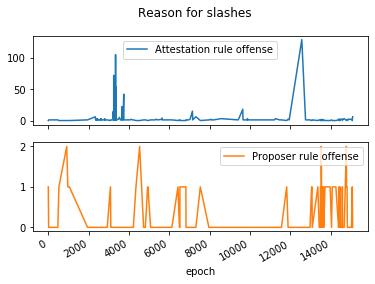

In [20]:
num_slashed_over_epoch_reason.plot(subplots=True)
plt.suptitle('Reason for slashes')
plt.show()

Despite the proposer rule offenses being rare throughout all epochs it was, interestingly enough, the very first offense committed by a validator on the network. Overtime proposer violations have becoming more frequent as shown in the subsequent time series graphs.

## Your Turn

<img src="images/Cut_outs/Cut_out_02.png" width=100 height=100 />

Create a time series of the cumulative number of the reason. 

## Answers:

In [21]:
cumul_num_slashed_over_epoch_reason = df_slashed.groupby(['epoch','reason']).count()['rowindex'].unstack().fillna(0).cumsum()

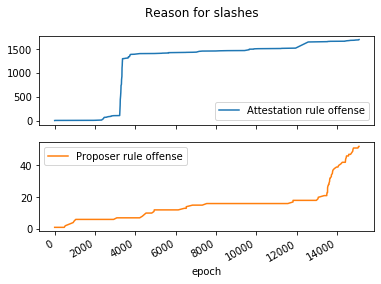

In [22]:
cumul_num_slashed_over_epoch_reason.plot(subplots=True)
plt.suptitle('Reason for slashes')
plt.show()

## Slashed or Be Slashed

Let's turn our attention to the distribution of number of slashings received and the number of slashings performed.


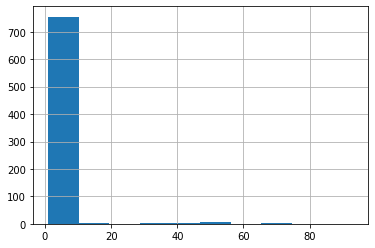

In [23]:
df_slashed.groupby('slashedBy').count()['rowindex'].hist()
plt.show()

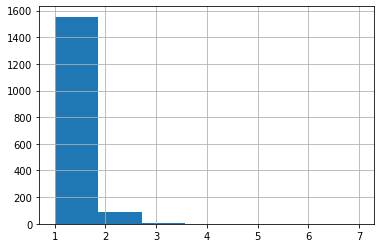

In [24]:
df_slashed.groupby('validatorSlashed').count()['rowindex'].hist(bins=7)
plt.show()

We can see that, of the validators that have slashed, most have only done slashings once or twice. Similarly, most validators, who have been slashed, have received only one or two lashings, and only a handful of them have been slashed more than 2 times. 


<img src="images/Cut_outs/Cut_out_21.png" width=100 height=100 />

## Validator Data 

To learn more about the validators, we will bring in a second dataset that is also obtained from the Beacon Scan block explorer. To learn more about the data set, you can read our case study on it as well. In short, this data set provides the following information on any given validator:

* `X` - The row index of the validator.
* `publickey` - The public key identifying the validator.
* `index` - The index number of the validator.
* `currentBalance` - The current balance, in ETH, of the validator.
* `effectiveBalance` - The effective balance, in ETH, of the validator.
* `proposed` - The number of blocks assigned, executed, and skipped by the validator.
* `eligibilityEpoch` - The epoch number that the validator became eligible.
* `activationEpoch` - The epoch number that the validator activated.
* `exitEpoch` - The epoch number that the validator exited.
* `withEpoch` - Epoch when the validator is eligible to withdraw their funds. This field is not applicable if the validator has not exited.
* `slashed` - Whether the given validator has been slashed.


## How long before a validator get slashed or slash others?

We have the 'epoch' when a validator was slashed and also their 'activationEpoch'. Thus, the difference will answer how long before a validator get slashed. However, we have some validators who was slashed more than once, we will need to get the rows where the first slashing occurs for each unique validator, i.e. the minimum difference.

However, 'epoch' and 'activationEpoch' are in different data set. Thus, we need to first combine these two datasets using the validator index. Since we want the 'activationEpoch' of the validator that was slashed, we will merge the two dataframe on 'validatorSlashed' and 'index' via <b> pd.merge() </b>.

Also, we need to convert 'activationEpoch' to numeric values. 

In [25]:
df_validator = pd.read_csv('validator_data.csv',encoding = 'ISO-8859-1')
#Note that we need the encoding parameter here as the csv file has some special character: '|'

In [26]:
df_validator = df_validator.replace(['genesis'],0)
df_validator['activationEpoch'] = df_validator['activationEpoch'].astype(int)
df_join_slashed = pd.merge(df_slashed,df_validator,left_on='validatorSlashed', right_on='index')

To find out how long before a validator get slashed, we will do the following:

1. Create 'timetoslashed' by subtracting 'SlashedActivation' from 'epoch' 
2. Get the mininimum 'timetoslashed' of each group <b> groupby </b> and <b> min() </b>
3. Compute summary statistics using <b> describe() </b>


In [27]:
df_join_slashed['timetoslashed'] = df_join_slashed['epoch']-df_join_slashed['activationEpoch']
df_join_slashed.groupby('validatorSlashed').min()['timetoslashed'].describe()

count     1647.000000
mean      3919.092289
std       2695.868257
min          4.000000
25%       2772.000000
50%       3270.000000
75%       3353.000000
max      15087.000000
Name: timetoslashed, dtype: float64

Thus, on average, validators are slashed after 3919 epoch. Note that this average accounts for only validators who are slashed at least once. Similarly, we can compute 'timetoslash' to find out how long before a validator slashes others.

All we need to do is change a few things from the code in previous two slides. Take a few minutes to figure out the code!

In [28]:
df_join_slasher = pd.merge(df_slashed,df_validator,left_on='slashedBy', right_on='index')
df_join_slasher['timetoslash'] = df_join_slasher['epoch']-df_join_slasher['activationEpoch']
df_join_slasher.groupby('slashedBy').min()['timetoslash'].describe()

count      771.000000
mean      3409.372244
std       2502.638251
min          4.000000
25%       2304.500000
50%       3251.000000
75%       3340.500000
max      14892.000000
Name: timetoslash, dtype: float64

On average, a validator marks their first slash in the initial 3409 epochs after activation. The fastest first slash was found to occur only 4 epochs after activation, while the slowest first slash was 14892 epochs after activation.

## Top Slashers

In previous slide, we looked at the  Distribution of the Number of Slashings Performed by a Validator. There was a validator that has slashed others more than 90 times. We are interested to see who these frequent slashers are. 

Since we have the data 'df_joined_slasher', we can easily get the information of these frequent slashers simply group by 'slashedBy' and arrange them according to their slashing frequency. 


In [29]:
df_join_slasher['SlashingFrequency']=df_join_slasher.groupby('slashedBy')['slashedBy'].transform('count')

In [30]:
df_join_slasher.drop_duplicates('slashedBy',inplace=True)
Slashers = df_join_slasher.sort_values('SlashingFrequency',ascending=False)[['slashedBy', 'currentBalance', 'effectiveBalance', 'proposed', 'activationEpoch', 'SlashingFrequency']]
Slashers.head(10)

slashedBy currentBalance effectiveBalance       proposed  \
112       36677   32.60514 ETH           32 ETH    7  |7  |  0   
794       20794   32.05997 ETH           31 ETH  16  |14  |  2   
1447      31770   31.86032 ETH           31 ETH   10  |9  |  1   
1035      11806   31.88551 ETH           31 ETH   12  |9  |  3   
1373      13469   31.79314 ETH           31 ETH  12  |10  |  2   
544         104   31.87478 ETH           31 ETH  12  |11  |  1   
459       24603   31.82561 ETH           31 ETH  17  |16  |  1   
1319       1707    31.8804 ETH           31 ETH    9  |8  |  1   
1116       5068     31.691 ETH           31 ETH  19  |16  |  3   
949       14401    31.8831 ETH           31 ETH    9  |9  |  0   

      activationEpoch  SlashingFrequency  
112              4379                 93  
794               215                 67  
1447             2959                 66  
1035                0                 56  
1373                0                 52  
544                 0                 51  
459              1167                 51  
1319                0                 48  
1116                0                 46  
949                 0                 44

The table shows the top 10 validators that have done the most slashings. These slashers have similar current balance and effective balance. Most of them were also active for a long period of time. According to the tier system we created on the Case Study we did on validator data, 8 out of these top 10 slashers reside in tier 3 where validators' performance becomes noticeably worse.


## Visualizing the Slashings

Due to the sink-source structure of the 'slashedBy' and 'validatorSlashed' columns, it allows us to treat the various slashes as directed edges in a directed graph. A directed graph consists of a set of nodes and directed edges, where the directed edges represent some relationship between the nodes. The nodes in this instance are the individual validators, and a directed edge exists between two nodes if one node has slashed the other. 

We will use the <b> networkx </b> library to draw the graph. We will first create the adjaceny matrix using <b> crosstab() </b>. Then, <b? use columns.union() </b> and <b> reindex() </b> to put the index back. 

In [31]:
import networkx as nx

In [32]:
adjacenymatrix = pd.crosstab(df_slashed.slashedBy, df_slashed.validatorSlashed)
idx = adjacenymatrix.columns.union(adjacenymatrix.index)
adjacenymatrix = adjacenymatrix.reindex(index = idx, columns=idx, fill_value=0).to_numpy()

In [33]:
DG =nx.DiGraph(adjacenymatrix)

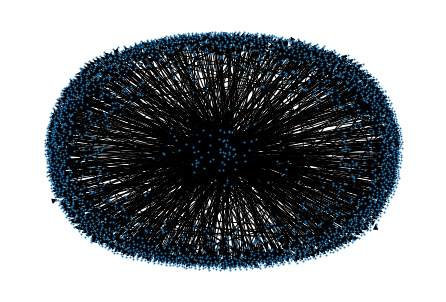

In [34]:
nx.draw(DG, node_size=1)

Since the whole network comprised of many vertices, we can decompose the network to all its connected component subgraphs to have a better understanding. Unfortunately, the library does not have the option for directed graphs. We will simply use undirected graph for this instead. We will use <b> nx.connected_components() </b>. 

In [35]:
G = nx.Graph(adjacenymatrix)

In [36]:
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)

415

This shows that the largest connected subgraphs has 415 vertices. Now, let's get all these subgraphs and draw them!

In [37]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
len(S)

660

We see that there are a total of 660 connected subgraphs.

To plot any of the subgraphs, we can simply use the following code:

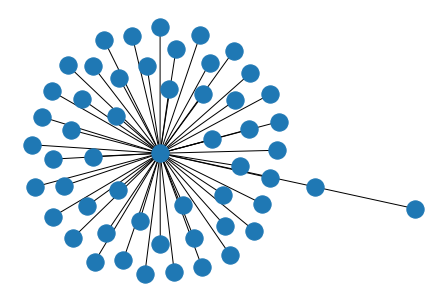

In [38]:
nx.draw(S[1])

Let's find the subgraphs with the highest numbers of vertices. To do so, we can simply use a for loop to count the number of vertices of each subgraph.

In [39]:
num_vertices = [len(c) for c in nx.connected_components(G)]

In [42]:
num_vertices[0:5]

[415, 54, 3, 6, 2]

We can see that the first subgraph is the one with 415 vertices. So let's graph that!

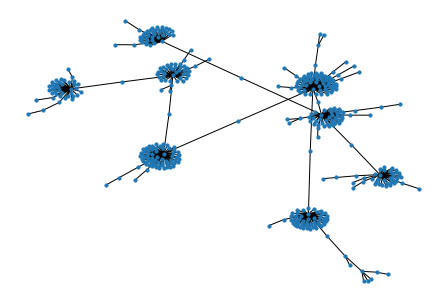

In [41]:
nx.draw(S[0], node_size=10)

We can kind of see 8 validators that have done a high number of slashes and each of them have a star structure as they never slash the same validator twice.

## Interesting observations

There were two interesting observations about the slashing behavior that were particularly important to understanding the nature of the network visualizations. 

The first was that there was not one validator that had been slashed by the same validator twice. 

The second observation we discovered was that there were no instances of "revenge slashing" in which a validator slashed a second validator, and then the second validator eventually slashed the first in return. 

When you combine these two facts, it explains why all of the networks we produced were only simple directed graphs (i.e. it has no loops or multiple edges).


## Conclusion
Through our analysis of ETH2's security mechanism for blockchain security known as "slashing", we've observed some interesting patterns in its frequency, those who perform them, and their recipients. Some key findings include:

* Less than 1% of the validators have been slashed or slashed someone else.
* The number of attestation offenses vastly outweighed the number of proposer rule violations.
* Slashings take place at a rate of only 6.3 per 100 epochs.
* We identified presence of "super-slashers" who, despite their prevalence for slashing other validators, typically  didn't have the best performance themselves.
* There was no evidence of "revenge" slashing, where a validator who was slashed reciprocated one.
* No two pairs of slasher and slashed appeared twice in the data.
* Slashing patterns in the network induce a simple star like structure when graphing the nodes and edges,
* Complexity in the graphs come in the form of single link or multi link connections that expand with the number of slashings.

As the network of interconnected violators continues to grow, we expect the number of interesting sub-graphs to grow with it and represent some interesting dynamics in terms of the interaction between validators as it pertains to slashing.

<img src="images/Cut_outs/Cut_out_07.png" width=100 height=100 />


## References

* Ethereum [https://ethereum.org/]
* Medalla Data Challenge [https://ethereum.org/en/eth2/get-involved/medalla-data-challenge/]
* Medalla Data Challenge Wishlist [https://www.notion.so/Wishlist-The-Eth2-Medalla-Data-Challenge-69fe10ffe83748bc87faa0e2586ba857]
* Ethereum 2.0 Beacon Chain Explorer [beaconscan.com/]
* Consensys Glossary of Ethereum 2.0 Terms [https://consensys.net/knowledge-base/ethereum-2/glossary/]
* Breaking Down ETH 2.0 - Sharding Explained [https://academy.ivanontech.com/blog/breaking-down-eth-2-0-sharding-explained]
* Rewards and Penalties on Ethereum 2.0 [Phase 0] [https://codefi.consensys.net/blog/rewards-and-penalties-on-ethereum-20-phase-0]
* Ethereum 2.0 Explained | Part II | Phase 0 and the Beacon Chain [https://youtu.be/-qwSAFcicg8]